In [1]:
import sys
sys.path.append('../')

from laser_beam import LaserBeam
import plotly.graph_objects as go
from scipy.stats import norm

import plotly.io as pio
pio.renderers.default = 'png'

LaserBeam is a class for processing information from the scanner, which is stored in a hdf5 file

In [2]:
path1 = '../data/data.hdf5'
path2 = '../data/data2.hdf5'

In [3]:
lb1 = LaserBeam.from_hdf(path1)

In [4]:
lb1

LaserBeam(sensor=array([1, 3, 1, ..., 4, 1, 2]), mapping=array([0, 0, 0, ..., 0, 0, 0]), image_width=310, image_height=300, file_name='../data/data.hdf5')

LaserBeam object is initialized with raw data, however it is also possible to operate with cleaned data:

In [5]:
lb1.clean_sensor, lb1.clean_sensor

(array([0, 1, 1, ..., 2, 0, 0]), array([0, 1, 1, ..., 2, 0, 0]))

Restoring picture and saving to the file:

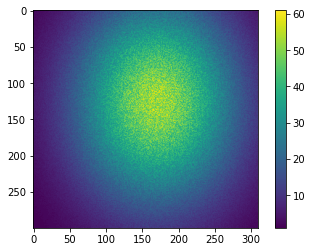

In [6]:
lb1.draw_image()

In [7]:
lb1.save_image()

Calculating mean and sigma for the middle horizontal line of the image:

In [8]:
row = lb1.pixel_matrix.shape[0] // 2 + 1

mean, sigma = LaserBeam.fit_gaussian(lb1.pixel_matrix[row])

y = lb1.pixel_matrix[row]
x = list(range(len(y)))

In [9]:
lb2 = LaserBeam.from_hdf(path2)

row = lb2.pixel_matrix.shape[0] // 2 + 1

mean2, sigma2 = LaserBeam.fit_gaussian(lb2.pixel_matrix[row])
y2 = lb2.pixel_matrix[row]
x2 = list(range(len(y2)))

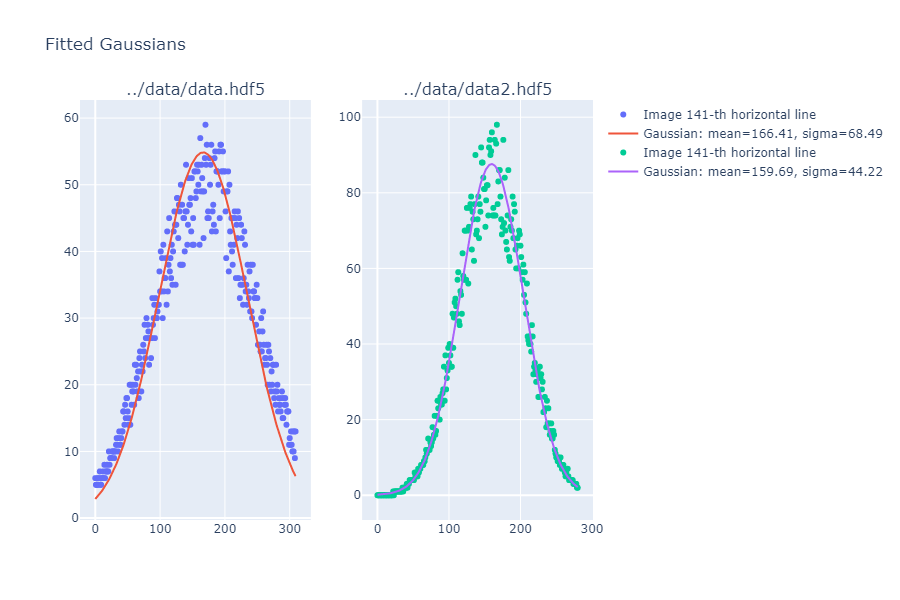

In [10]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, subplot_titles=(path1, path2))

fig.add_trace(
    go.Scatter(x=x, y=y,
                    mode='markers',
                    name=f'Image {row}-th horizontal line'),
    row=1, 
    col=1
)

fig.add_trace(
    go.Scatter(x=x, y=norm.pdf(x, mean, sigma)*sum(y),
                    mode='lines',
                    name=f'Gaussian: mean={mean:.2f}, sigma={sigma:.2f}'),
    row=1, 
    col=1
)

fig.add_trace(
    go.Scatter(x=x2, y=y2,
                    mode='markers',
                    name=f'Image {row}-th horizontal line'),
    row=1, 
    col=2
)

fig.add_trace(
    go.Scatter(x=x2, y=norm.pdf(x2, mean2, sigma2)*sum(y2),
                    mode='lines',
                    name=f'Gaussian: mean={mean2:.2f}, sigma={sigma2:.2f}'),
    row=1, 
    col=2
)

fig.update_layout(height=600, width=900, title_text="Fitted Gaussians")
fig.show()